In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, geom, powerlaw, zipf, pareto
import networkx as nx

np.random.seed(42) 

## Excercise 1

Draw a histogram with marked sigma intervals for random variables
from the normal distribution

/tmp/ipykernel_6184/1944661364.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, norm.pdf(x, 0, 1), 'r', linewidth=2, label="PDF", color='fuchsia')


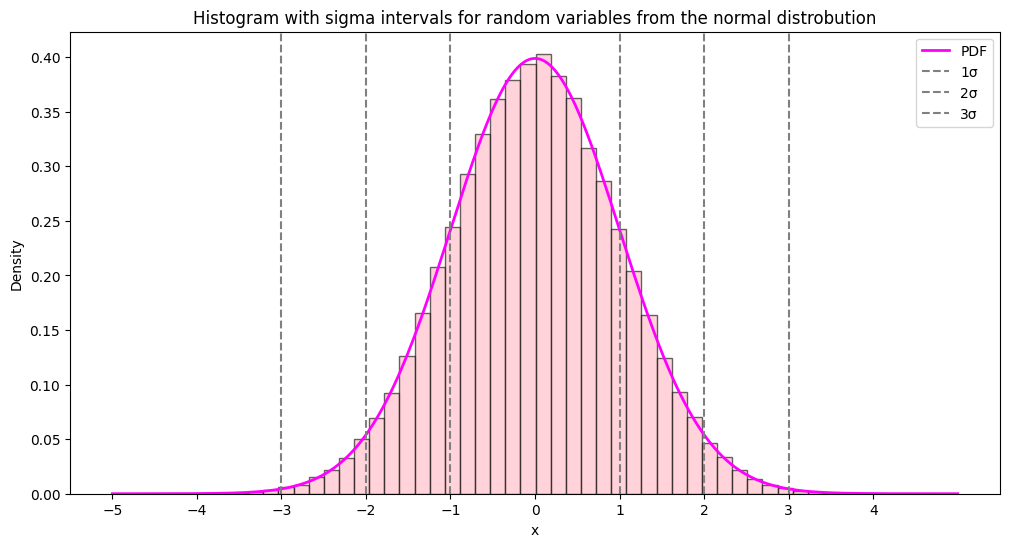

In [2]:
# histogram 
data_normal = np.random.normal(0, 1, 100_000)
plt.figure(figsize=(12, 6))
plt.hist(data_normal, bins=50, density=True, alpha=0.6, color='lightpink', edgecolor='black')

# PDF
x = np.linspace(-5, 5, 1_000)
plt.plot(x, norm.pdf(x, 0, 1), 'r', linewidth=2, label="PDF", color='fuchsia')

# mark sigma
for sigma in range(1, 4):
    plt.axvline(sigma, color='grey', linestyle='--', label=f'{sigma}σ')
    plt.axvline(-sigma, color='grey', linestyle='--')

plt.title("Histogram with sigma intervals for random variables from the normal distrobution")
plt.xlabel("x")
plt.ylabel("Density")
plt.xticks(np.arange(-5, 5, 1))
plt.legend()
plt.show()

## Excercise 2

Check the Pareto rule for variables from the geometric distribution

In [3]:
p_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for p in p_values:
    print(f"p = {p}")
    data = geom.rvs(p=p, size=1_000)
    sorted_data = sorted(data)

    sum_of_best_20 = sum(sorted_data[-200:])
    general_sum = sum(data)

    print(f'Sum of best 20 %: {sum_of_best_20}')
    print(f'80 % of all: {round(general_sum * 0.8, 2)}\n')

p = 0.1
Sum of best 20 %: 4729
80 % of all: 7598.4

p = 0.2
Sum of best 20 %: 2522
80 % of all: 4127.2

p = 0.3
Sum of best 20 %: 1558
80 % of all: 2649.6

p = 0.4
Sum of best 20 %: 1160
80 % of all: 2013.6

p = 0.5
Sum of best 20 %: 885
80 % of all: 1672.0

p = 0.6
Sum of best 20 %: 716
80 % of all: 1384.8

p = 0.7
Sum of best 20 %: 538
80 % of all: 1158.4

p = 0.8
Sum of best 20 %: 434
80 % of all: 987.2

p = 0.9
Sum of best 20 %: 325
80 % of all: 900.0



^ not working

## Excercise 3

Draw a histogram with marked sigm intervals for variables drawn from a continuous power distribution

/tmp/ipykernel_6184/3043671486.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, pareto.pdf(x, alpha), 'r', linewidth=2, label="PDF", color='fuchsia')


Mean: 1.5049637001700757


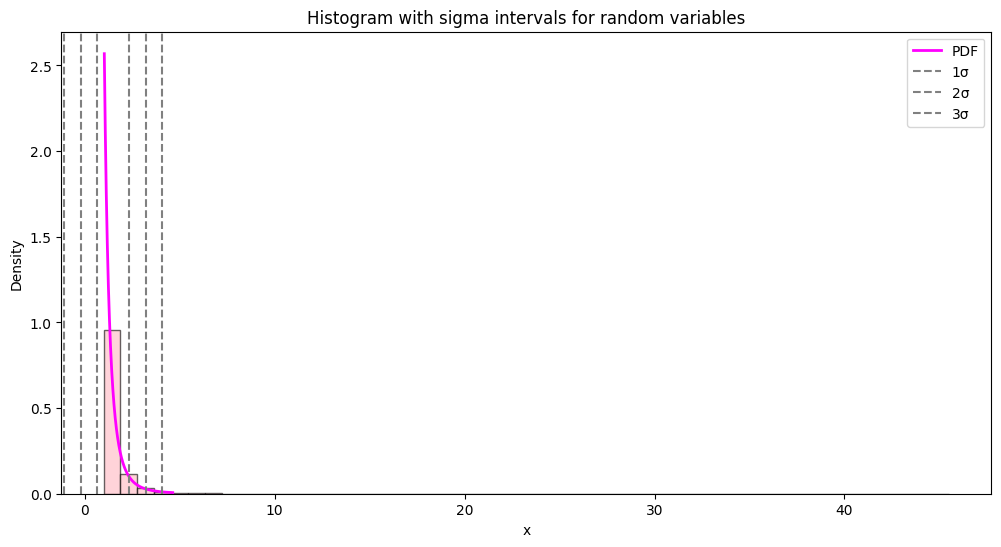

In [4]:
alpha = 3

# histogram 
data_power = pareto.rvs(alpha, size=100_000)
plt.figure(figsize=(12, 6))
plt.hist(data_power, bins=50, density=True, alpha=0.6, color='lightpink', edgecolor='black')

# PDF
x = np.linspace(pareto.ppf(0.11, alpha),
                pareto.ppf(0.99, alpha), 100_000)
plt.plot(x, pareto.pdf(x, alpha), 'r', linewidth=2, label="PDF", color='fuchsia')

mean = np.mean(data_power)
std_dev = np.std(data_power)

print(f'Mean: {mean}')

# mark sigma
for sigma in range(1, 4):
    plt.axvline(mean + sigma * std_dev, color='grey', linestyle='--', label=f'{sigma}σ')
    plt.axvline(mean - sigma * std_dev, color='grey', linestyle='--')

plt.title("Histogram with sigma intervals for random variables")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

## Excercise 4

Check the Pareto rule for variables from the zeta distribution

In [43]:
a_values = [1.5, 2, 2.5, 3, 3.5, 4]

for a in a_values:
    print(f'a = {a}')
    data = zipf.rvs(a=a, size=1_000)
    sorted_data = sorted(data)

    sum_of_best_20 = sum(sorted_data[-200:])
    general_sum = sum(data)

    print(f'Sum of best 20 %: {sum_of_best_20}')
    print(f'80 % of all: {round(general_sum * 0.8, 2)}\n')

a = 1.5
Sum of best 20 %: 329297
80 % of all: 265465.6

a = 2
Sum of best 20 %: 5144
80 % of all: 4942.4

a = 2.5
Sum of best 20 %: 1005
80 % of all: 1476.0

a = 3
Sum of best 20 %: 497
80 % of all: 1037.6

a = 3.5
Sum of best 20 %: 376
80 % of all: 940.8

a = 4
Sum of best 20 %: 317
80 % of all: 893.6



## Excercise 5

* generate BA network and ER graphs using built-in functions.
* observe the presence of hubs.
* draw a vertex degree histogram.
* compute estimators of expectation and variance for vertex
degrees.
* how are the two cases different?

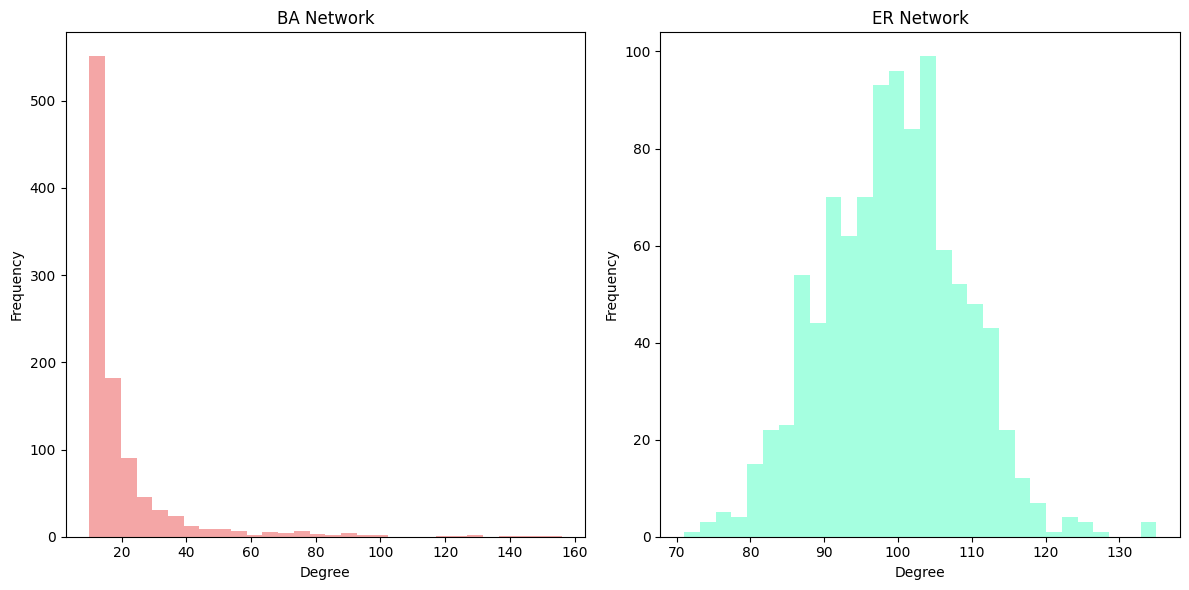

Comment:
BA - powerlaw
ER - normal


In [ ]:
num_nodes = 1_000  
num_edges = 10     

# dobrac parametry tak, zeby wartosc oczekiwana byla taka sama
# wartos oczekiwana wariancja
ba_network = nx.barabasi_albert_graph(num_nodes, num_edges)
er_network = nx.erdos_renyi_graph(num_nodes, p=0.1) 

ba_degrees = np.array(list(dict(ba_network.degree()).values()))
er_degrees = np.array(list(dict(er_network.degree()).values()))

ba_hubs = np.argsort(ba_degrees)[-5:][::-1]
er_hubs = np.argsort(er_degrees)[-5:][::-1]


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(ba_degrees, bins=30, color='lightcoral', alpha=0.7)
plt.title('BA Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(er_degrees, bins=30, color='aquamarine', alpha=0.7)
plt.title('ER Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

ba_expectation = np.mean(ba_degrees)
ba_variance = np.var(ba_degrees)

er_expectation = np.mean(er_degrees)
er_variance = np.var(er_degrees)


print("Comment:")
print("BA - powerlaw")
print("ER - normal")


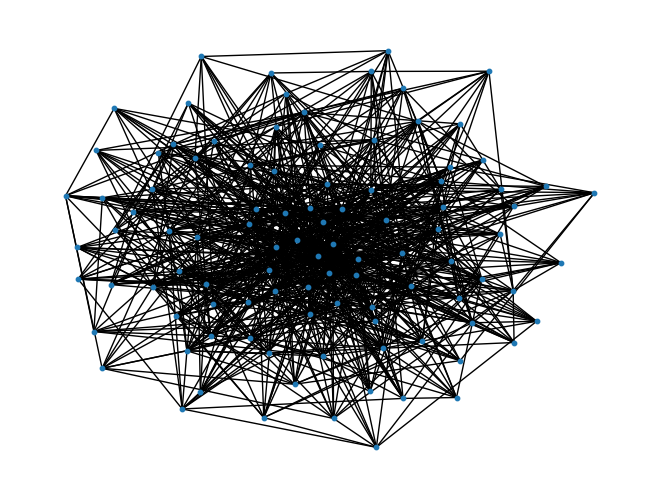

In [16]:
ba_network = nx.barabasi_albert_graph(100, num_edges)

nx.draw(ba_network, nx.spring_layout(ba_network, seed=42, k=0.1), node_size=10)

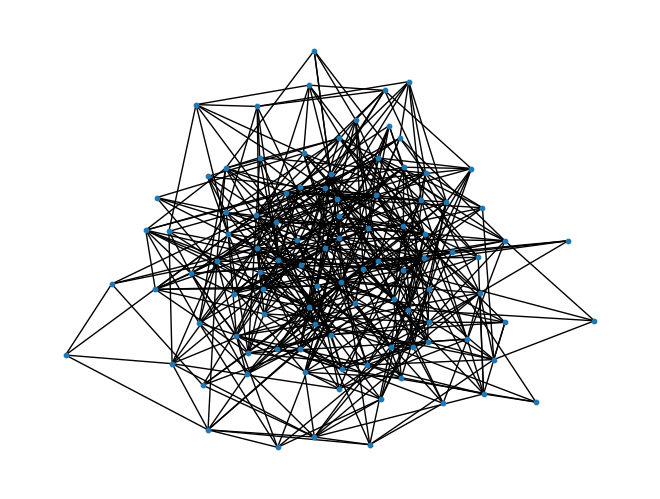

In [14]:
er_network = nx.erdos_renyi_graph(100, p=0.1) 

nx.draw(er_network,  nx.spring_layout(er_network, seed=42, k=0.1), node_size=10)


# Graph Visualization Methods

### P3.1 

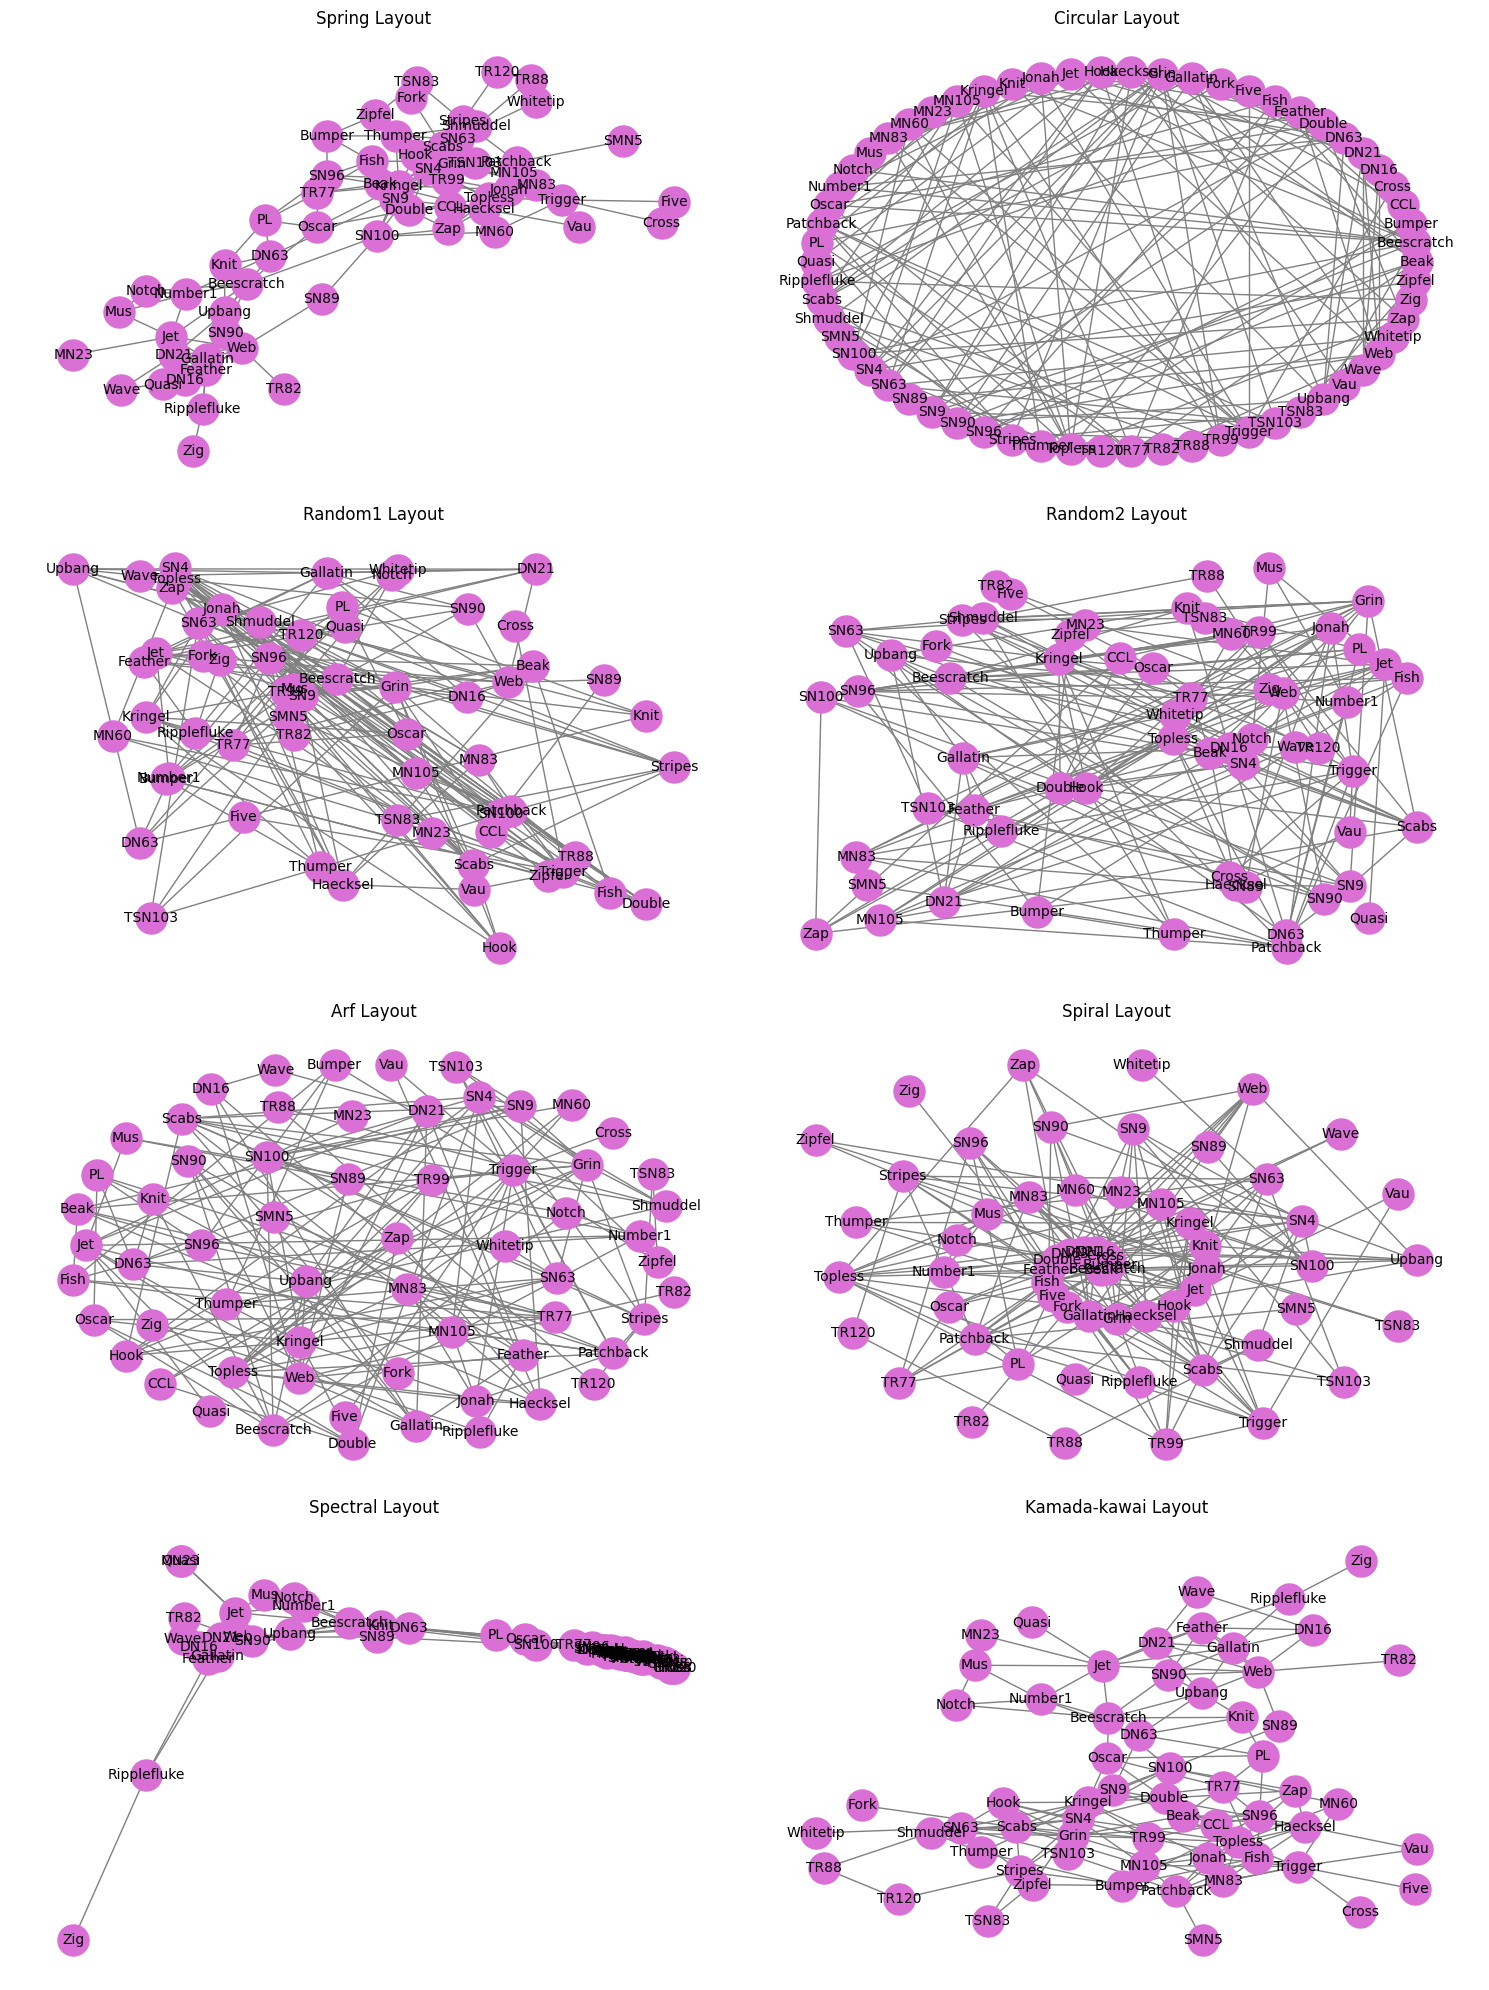

In [11]:
G = nx.read_gml('dolphins.gml') # <3


layouts = {
    "spring": nx.spring_layout,
    "circular": nx.circular_layout,
    "random1": nx.random_layout,
    "random2": nx.random_layout,
    "arf": nx.arf_layout,
    "spiral": nx.spiral_layout,
    "spectral": nx.spectral_layout,
    "kamada-kawai": nx.kamada_kawai_layout,
}

fig, axs = plt.subplots(4, 2, figsize=(15, 20))
axs = axs.flatten() 

for ax, (layout_name, layout_func) in zip(axs, layouts.items()):
    pos = layout_func(G) 
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='orchid', edge_color='gray', node_size=500, font_size=10)
    ax.set_title(f'{layout_name.capitalize()} Layout')

plt.tight_layout()
plt.show()
